# 1

### Import 

In [214]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [17]:
df = pd.read_csv('Hitters.csv')
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.000,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.000,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.000,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.500,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.000,A
6,-Al Newman,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.000,A
7,-Argenis Salazar,298,73,0,24,24,7,3,509,108,...,41,37,12,A,W,121,283,9,100.000,A
8,-Andres Thomas,323,81,6,26,32,8,2,341,86,...,32,34,8,N,W,143,290,19,75.000,N
9,-Andre Thornton,401,92,17,49,66,65,13,5206,1332,...,784,890,866,A,E,0,0,0,1100.000,A


In [90]:
### drop non-numeric features
dfnum = df.select_dtypes([np.number])

### drop missing salary
dff = dfnum.dropna(subset=['Salary'])
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [105]:
dff.shape

(263, 17)

### 1.1 Run Lasso

In [213]:
### standardize
from sklearn import preprocessing
# drop salary
x = dff.drop(columns = ['Salary'])
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_x = scaler.fit_transform(x)


In [113]:
# convert pandas dataframe to numpy array
X = scaled_x
y = dff['Salary'].to_numpy()

In [216]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### run lasso regression with cross validation
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-1, 3, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 10

lasso_regressor = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
lasso_regressor.fit(X, y)

print('The best alpha: ', lasso_regressor.best_params_)
print('Score: ', lasso_regressor.best_score_)

The best alpha:  {'alpha': 22.12216291070448}
Score:  0.3785886714874194


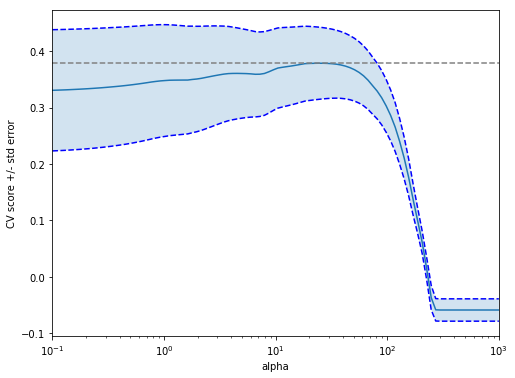

In [197]:
### plot score VS alpha
# reference: https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html

scores = lasso_regressor.cv_results_['mean_test_score']
scores_std = lasso_regressor.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

In [198]:
def PrintFormula(coefs, names, sort = False):
    
    lst = zip(coefs, names)
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

lasso = Lasso(alpha = 23.95026619987486)
lasso.fit(X,y)

names = list(dff.columns.values)
lst = zip(coefs, names)

print ("Lasso model:", PrintFormula(lasso.coef_,names))

Lasso model: 0.0 * AtBat + 83.958 * Hits + 0.0 * HmRun + 0.0 * Runs + 0.0 * RBI + 47.592 * Walks + 0.0 * Years + 0.0 * CAtBat + 0.0 * CHits + 0.0 * CHmRun + 75.695 * CRuns + 121.031 * CRBI + 0.0 * CWalks + 56.8 * PutOuts + -0.0 * Assists + -0.0 * Errors


#### Based on the formula above, we can conclude that there are 5 predictors left in the model. They are: Hits, Walks, CRuns, CRBI, and PutOuts.


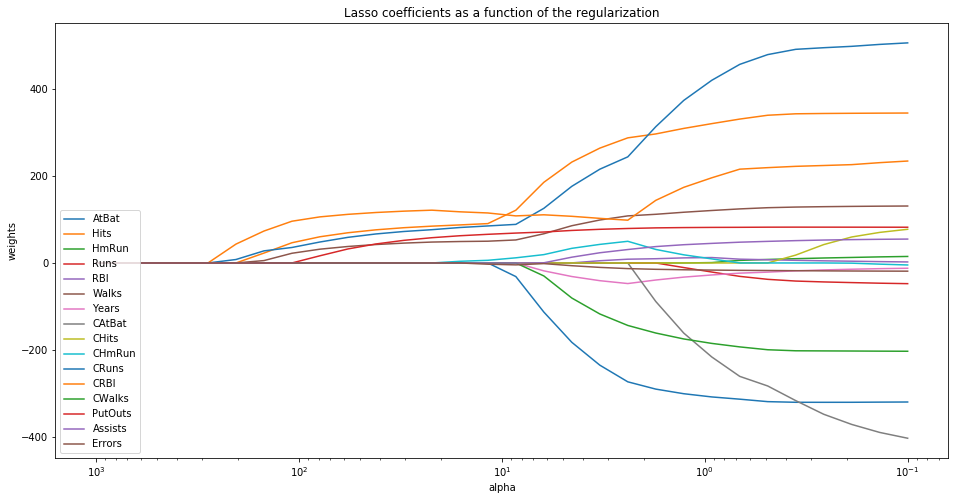

In [217]:
alphas = np.logspace(-1, 3, 30)

coefs = []
for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results
figure(num=None, figsize=(16, 8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
names = list(dff.columns.values)
plt.legend(names,loc='lower left')
plt.show()

#### The last three predictor remians in the model are Hits, CRBI and CRuns

### 1.2 Run Ridge

In [218]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

### run lasso regression with cross validation
ridge = Ridge(random_state=0, max_iter=10000)
alphas = np.logspace(-1, 3, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 10

ridge_regressor = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
ridge_regressor.fit(X, y)

print('The best alpha: ', ridge_regressor.best_params_)
print('Score: ', ridge_regressor.best_score_)

The best alpha:  {'alpha': 204.33597178569417}
Score:  0.38062753497705915


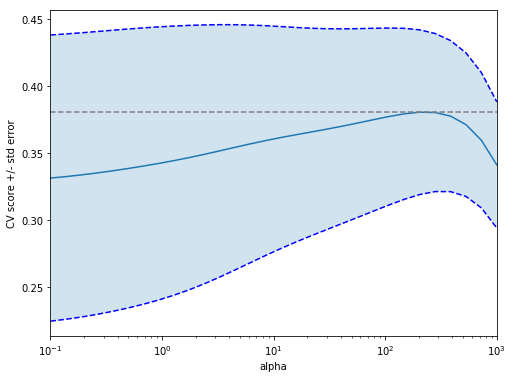

In [220]:
### plot score VS alpha
# reference: https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html

scores = ridge_regressor.cv_results_['mean_test_score']
scores_std = ridge_regressor.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

In [227]:
ridge = Ridge(alpha = 204.33597178569417)
ridge.fit(X,y)

names = list(dff.columns.values)
lst = zip(coefs, names)
print ("Lasso model:", PrintFormula(ridge.coef_,names))

Lasso model: 11.253 * AtBat + 38.106 * Hits + 4.1 * HmRun + 27.517 * Runs + 23.547 * RBI + 35.515 * Walks + 7.349 * Years + 25.78 * CAtBat + 36.496 * CHits + 32.05 * CHmRun + 37.626 * CRuns + 38.007 * CRBI + 15.771 * CWalks + 46.099 * PutOuts + 4.411 * Assists + -8.058 * Errors


##### Ridge does not zero out coefficient like lasso, but predictors with larger absolute value of coefficient are more important.

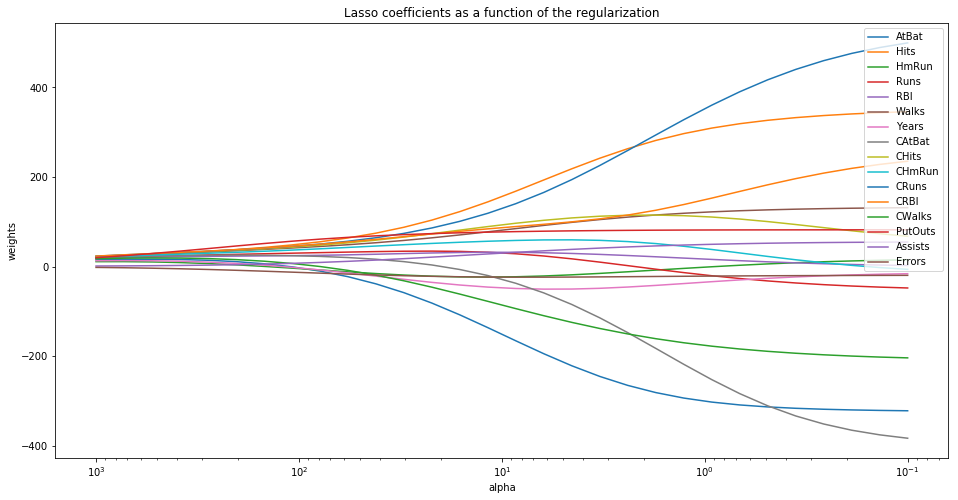

In [228]:
alphas = np.logspace(-1, 3, 30)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results
figure(num=None, figsize=(16, 8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
names = list(dff.columns.values)
plt.legend(names,loc='upper right')
plt.show()

### 2

##### Bias-variance tradeoff is a property of a prediction model. As the amount of predictors increases, the complexity of a model increase, therefore increasing the variance and decreasing bias. Regularization is an important step to keep the balance between variance and bias. Through out the practice in question (1), we can see how regularization like LASSO decrease the complexity of a model by reducing predictors, and hence increase evaluation score.